In [3]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
*converts the CSV file into a Pandas dataframe.*

In [5]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('archive (21)/final_data.csv')

### *Viewing the dataframe*


In [6]:
df.shape

(10754, 22)

In [7]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [10]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

### *there is no null and this a little bit weird*.... we may check it later

In [11]:
df.value_counts()

player                                     team                    name                position                    height  age   appearance  goals     assists   yellow cards  second yellow cards  red cards  goals conceded  clean sheets  minutes played  days_injured  games_injured  award  current_value  highest_value  position_encoded  winger
/aaron-appindangoye/profil/spieler/254249  Sivasspor               Aaron Appindangoyé  Defender Centre-Back        184.0   31.0  35          0.067014  0.033507  0.067014      0.000000             0.000000   0.000000        0.000000      2686            436           74             1      750000         1800000        2                 0         1
/mohamed-bouchouari/profil/spieler/546225  FC Emmen                Mohamed Bouchouari  Defender Right-Back         170.0   22.0  34          0.076596  0.076596  0.114894      0.000000             0.000000   0.000000        0.000000      2350            6             1              0      500000         500

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [15]:
df.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


#### *lets see if there is outliers in prices*

In [22]:
prices=df['current_value']

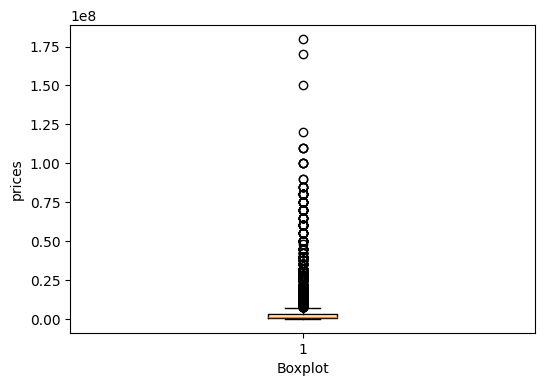

In [28]:
plt.figure(figsize=(6,4))
plt.boxplot(prices)
plt.xlabel('Boxplot')
plt.ylabel('prices')
plt.show()

In [30]:
prices.describe()

count    1.075400e+04
mean     3.622971e+06
std      9.095410e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      3.000000e+06
max      1.800000e+08
Name: current_value, dtype: float64

### *clearly there is alot of outliers!!*
##### *the Quritles 1 2 and 3 prices are between 300K and 3M , then we have alot of values are above that until we reach 180 M*

### And when we search about the dataset, we find that its from :
##### *11 European leagues, England, Germany, Spain, Italy, France, Netherlands,Portugal, Russia, Turkey,Austria.*

##### *4 American leagues, Brazil, United States, Argentina, Mexico.*

##### *1 African league, South Africa.*

##### *4 Asian leagues, Japan, Saudi Arabia, South Korea, Australia.*

#### *so we assume that the differnces between regions markets may cause the outliers in prices*



#### *here we will categorize players based on their league and country;*
#### *so we need to categorize all teams*

In [31]:
df['team'].unique()

array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton &amp; Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',

In [140]:
# Lists for each region
america = [
    'Club Athletico Paranaense', 'Red Bull Bragantino', 'Santos FC',
    'Clube de Regatas Vasco da Gama', 'Fluminense Football Club', 'Sport Club Internacional',
    'Esporte Clube Bahia', 'Grêmio Foot-Ball Porto Alegrense', 'Coritiba Foot Ball Club',
    'Fortaleza Esporte Clube', 'Cruzeiro Esporte Clube', 'Goiás Esporte Clube',
    'Cuiabá Esporte Clube (MT)', 'Botafogo de Futebol e Regatas', 'Clube Atlético Mineiro',
    'São Paulo Futebol Clube', 'América Futebol Clube (MG)', 'Sociedade Esportiva Palmeiras',
    'CR Flamengo', 'Sport Club Corinthians Paulista', 'Santos Laguna', 'Club León FC',
    'FC Juárez', 'Club Tijuana', 'Atlético de San Luis', 'Club Necaxa', 'Puebla FC',
    'Mazatlán FC', 'Querétaro FC', 'CF América', 'CF Monterrey', 'Atlas Guadalajara',
    'UNAM Pumas', 'Deportivo Toluca', 'Tigres UANL', 'Deportivo Guadalajara', 'CD Cruz Azul',
    'CF Pachuca', 'Philadelphia Union', 'FC Cincinnati', 'FC Dallas', 'Orlando City SC',
    'Los Angeles Galaxy', 'New England Revolution', 'D.C. United', 'New York Red Bulls',
    'Portland Timbers', 'Columbus Crew', 'Charlotte FC', 'Sporting Kansas City',
    'Colorado Rapids', 'Vancouver Whitecaps FC', 'Chicago Fire FC', 'Inter Miami CF',
    'Minnesota United FC', 'Houston Dynamo FC', 'St. Louis CITY SC', 'CF Montréal',
    'Real Salt Lake City', 'Nashville SC', 'San Jose Earthquakes', 'Seattle Sounders FC',
    'Atlanta United FC', 'New York City FC', 'Austin FC', 'Los Angeles FC', 'Toronto FC',
    'CA Vélez Sarsfield', 'CA San Lorenzo de Almagro', 'Club Atlético Lanús', 'Defensa y Justicia',
    'Club Estudiantes de La Plata', "CA Newell's Old Boys", 'CA Colon', 'CA Rosario Central',
    'CA Banfield', 'Club de Gimnasia y Esgrima La Plata', 'Club Atlético Tucumán',
    'CD Godoy Cruz Antonio Tomba', 'Club Atlético Unión', 'Club Atlético Platense',
    'Instituto AC Córdoba', 'CA Sarmiento (Junin)', 'CA Central Córdoba (SdE)',
    'CA Barracas Central', 'Arsenal Fútbol Club', 'Club Atlético Talleres', 'Club Atlético Belgrano',
    'AA Argentinos Juniors', 'CA Independiente', 'Club Atlético Tigre', 'CA River Plate',
    'CA Boca Juniors', 'CA Huracán', 'Racing Club'
]

asia1 = [
    'Kawasaki Frontale', 'Yokohama F. Marinos', 'Cerezo Osaka', 'Kyoto Sanga', 'FC Tokyo',
    'Nagoya Grampus', 'Kashiwa Reysol', 'Yokohama FC', 'Avispa Fukuoka', 'Sagan Tosu',
    'Vissel Kobe', 'Hokkaido Consadole Sapporo', 'Shonan Bellmare', 'Albirex Niigata',
    'Kashima Antlers', 'Sanfrecce Hiroshima', 'Urawa Red Diamonds', 'Gamba Osaka',
    'Al-Shabab Club (Riyadh)', 'Ettifaq FC', 'Al-Taawoun FC', 'Al-Wehda FC', 'Damac FC',
    'Al-Tai', 'Al-Fayha FC', 'Abha Club', 'Al-Khaleej', 'Al-Raed SFC', 'Al-Batin FC',
    'Al-Adalah FC', 'Al-Ittihad Club (Jeddah)', 'Al-Fateh SC', 'Al-Hilal Saudi FC', 'Al-Nassr FC',
    'Suwon Samsung Bluewings', 'Jeju United', 'Incheon United', 'Gangwon FC', 'Daejeon Hana Citizen',
    'Gwangju FC', 'Daegu FC', 'Suwon FC', 'Pohang Steelers', 'FC Seoul', 'Jeonbuk Hyundai Motors',
    'Ulsan Hyundai', 'Melbourne Victory', 'Western United FC', 'Newcastle United Jets',
    'Perth Glory', 'Macarthur FC', 'Brisbane Roar', 'Central Coast Mariners', 'Wellington Phoenix',
    'Melbourne City FC', 'Sydney FC', 'Adelaide United', 'Western Sydney Wanderers'
]

africa = [
    'Sekhukhune United FC', 'AmaZulu FC', 'Lamontville Golden Arrows', 'Stellenbosch FC',
    'Swallows FC', 'Maritzburg United FC', 'Royal AM FC', 'TS Galaxy FC', 'Richards Bay FC',
    'Marumo Gallants FC', 'Cape Town City FC', 'Orlando Pirates', 'SuperSport United',
    'Chippa United', 'Mamelodi Sundowns FC', 'Kaizer Chiefs'
]

europe = [
    'Manchester United', 'West Ham United', 'Leicester City', 'Aston Villa', 'Wolverhampton Wanderers',
    'Southampton FC', 'Brighton & Hove Albion', 'Everton FC', 'Nottingham Forest', 'Leeds United',
    'Crystal Palace', 'Fulham FC', 'AFC Bournemouth', 'Brentford FC', 'Liverpool FC',
    'Newcastle United', 'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
    'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim', '1.FC Union Berlin',
    'FC Augsburg', 'VfB Stuttgart', '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
    'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt', 'SC Freiburg', 'Borussia Dortmund',
    'Bayer 04 Leverkusen', 'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
    'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF', 'Sevilla FC', 'Celta de Vigo',
    'CA Osasuna', 'Girona FC', 'Rayo Vallecano', 'RCD Mallorca', 'UD Almería', 'Real Valladolid CF',
    'Cádiz CF', 'Elche CF', 'RCD Espanyol Barcelona', 'Getafe CF', 'Atlético de Madrid', 'Real Madrid',
    'FC Barcelona', 'AS Roma', 'SS Lazio', 'ACF Fiorentina', 'US Sassuolo', 'Torino FC', 'Udinese Calcio',
    'Bologna FC 1909', 'AC Monza', 'FC Empoli', 'US Lecce', 'Spezia Calcio', 'Hellas Verona', 'UC Sampdoria',
    'US Cremonese', 'US Salernitana 1919', 'Atalanta BC', 'SSC Napoli', 'Inter Milan', 'AC Milan',
    'Juventus FC', 'AS Monaco', 'Stade Rennais FC', 'Olympique Marseille', 'OGC Nice', 'RC Lens',
    'FC Nantes', 'Montpellier HSC', 'FC Lorient', 'FC Toulouse', 'ESTAC Troyes', 'Stade Brestois 29',
    'Angers SCO', 'AJ Auxerre', 'Clermont Foot 63', 'AC Ajaccio', 'Olympique Lyon', 'LOSC Lille',
    'Stade Reims', 'RC Strasbourg Alsace', 'Paris Saint-Germain', 'AZ Alkmaar', 'Twente Enschede FC',
    'Vitesse Arnhem', 'FC Groningen', 'Fortuna Sittard', 'NEC Nijmegen', 'Sparta Rotterdam',
    'SC Cambuur Leeuwarden', 'Excelsior Rotterdam', 'FC Volendam', 'RKC Waalwijk', 'FC Emmen',
    'Go Ahead Eagles', 'FC Utrecht', 'SC Heerenveen', 'Ajax Amsterdam', 'PSV Eindhoven',
    'Feyenoord Rotterdam', 'SC Braga', 'FC Famalicão', 'Vitória Guimarães SC', 'CD Santa Clara',
    'GD Estoril Praia', 'Boavista FC', 'Portimonense SC', 'CS Marítimo', 'Casa Pia AC', 'FC Paços de Ferreira',
    'FC Arouca', 'FC Vizela', 'Rio Ave FC', 'GD Chaves', 'Gil Vicente FC', 'FC Porto', 'Sporting CP',
    'SL Benfica', 'Dynamo Moscow', 'Lokomotiv Moscow', 'FK Rostov', 'Krylya Sovetov Samara', 'FC Sochi',
    'Akhmat Grozny', 'Ural Yekaterinburg', 'FK Orenburg', 'FC Pari Nizhniy Novgorod', 'FK Khimki',
    'Torpedo Moscow', 'Fakel Voronezh', 'Spartak Moscow', 'CSKA Moscow', 'FK Krasnodar', 'Zenit St. Petersburg',
    'West Bromwich Albion', 'Sunderland AFC', 'Hull City', 'Preston North End', 'Stoke City', 'Queens Park Rangers',
    'Birmingham City', 'Cardiff City', 'Millwall FC', 'Reading FC', 'Blackpool FC', 'Bristol City',
    'Huddersfield Town', 'Rotherham United', 'Wigan Athletic', 'Middlesbrough FC', 'Coventry City', 'Luton Town',
    'Swansea City', 'Burnley FC', 'Watford FC', 'Sheffield United', 'Blackburn Rovers', 'Norwich City', 'Trabzonspor',
    'Besiktas JK', 'Basaksehir FK', 'Antalyaspor', 'Adana Demirspor', 'Alanyaspor', 'Kasimpasa', 'Konyaspor',
    'MKE Ankaragücü', 'Sivasspor', 'Kayserispor', 'Giresunspor', 'Istanbulspor', 'Hatayspor', 'Gaziantep FK',
    'Fatih Karagümrük', 'Ümraniyespor', 'Fenerbahce', 'Galatasaray', 'SK Sturm Graz', 'LASK', 'SCR Altach',
    'SC Austria Lustenau', 'SV Ried', 'TSV Hartberg', 'WSG Tirol', 'Rapid Vienna', 'Austria Vienna',
    'SK Austria Klagenfurt', 'Wolfsberger AC', 'Red Bull Salzburg'
]

# Printing the lists
print("America:", len(america))
print("Asia:", len(asia1))
print("Africa:", len(africa))
print("Europe:", len(europe))


America: 95
Asia: 58
Africa: 16
Europe: 205


In [128]:
afr = df[df['team'].isin(africa)]
afr.shape

(533, 22)

In [141]:
amr=df[df['team'].isin(america)]
amr.shape

(2733, 22)

In [49]:
asia=df[df['team'].isin(asia1)]
asia.shape

(1926, 22)

In [45]:
eur=df[df['team'].isin(europe)]
eur.shape

(5537, 22)

#### *Now lets check the outliers in each region ;) ......*

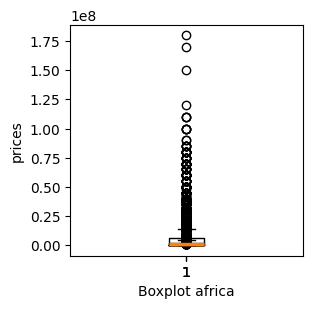

In [51]:
plt.figure(figsize=(3,3))
plt.boxplot(afr['current_value'])
plt.xlabel('Boxplot africa')
plt.ylabel('prices')

plt.boxplot(asia['current_value'])
plt.xlabel('Boxplot asia')
plt.ylabel('prices')

plt.boxplot(amr['current_value'])
plt.xlabel('Boxplot africa')
plt.ylabel('prices')

plt.boxplot(eur['current_value'])
plt.xlabel('Boxplot africa')
plt.ylabel('prices')

plt.show()

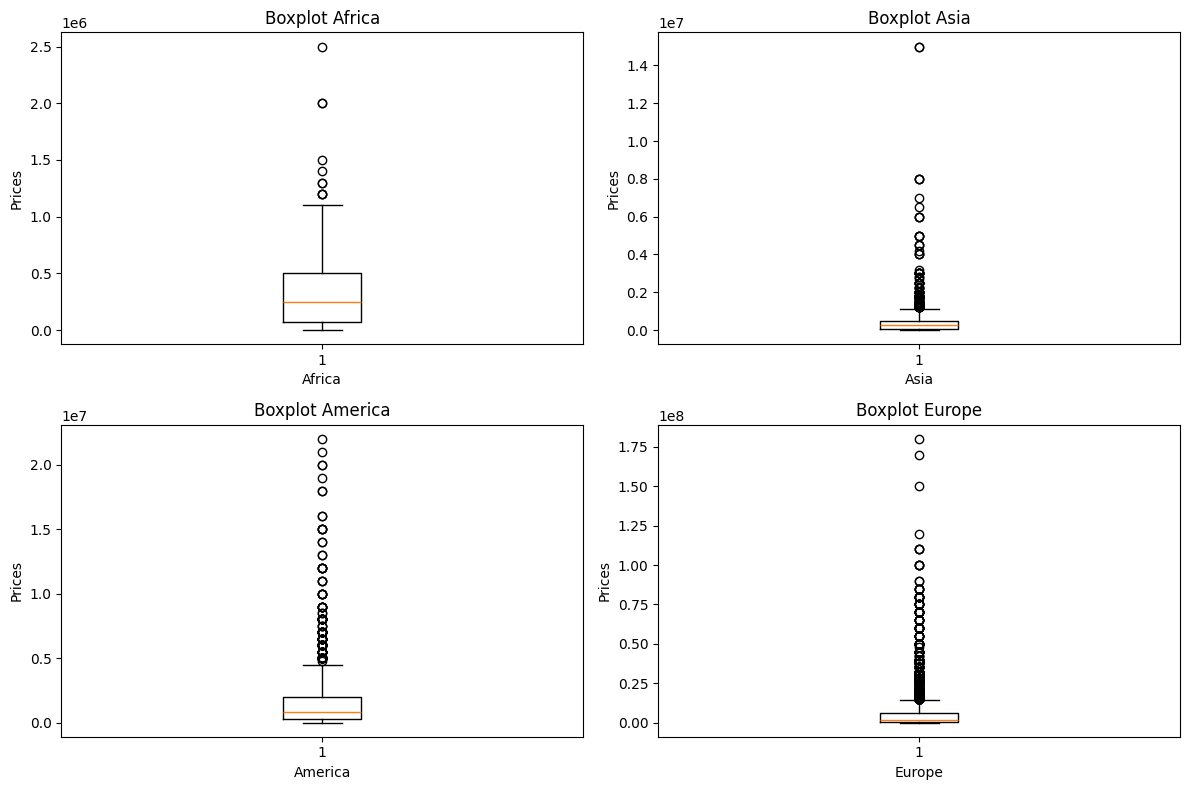

In [58]:
import matplotlib.pyplot as plt

# Create a figure with a size of 10x10 inches
plt.figure(figsize=(12, 8))

# First subplot: Boxplot for Africa
plt.subplot(2, 2, 1)
plt.boxplot(afr['current_value'])
plt.xlabel('Africa')
plt.ylabel('Prices')
plt.title('Boxplot Africa')

# Second subplot: Boxplot for Asia
plt.subplot(2, 2, 2)
plt.boxplot(asia['current_value'])
plt.xlabel('Asia')
plt.ylabel('Prices')
plt.title('Boxplot Asia')

# Third subplot: Boxplot for America
plt.subplot(2, 2, 3)
plt.boxplot(amr['current_value'])
plt.xlabel('America')
plt.ylabel('Prices')
plt.title('Boxplot America')

# Fourth subplot: Boxplot for Europe
plt.subplot(2, 2, 4)
plt.boxplot(eur['current_value'])
plt.xlabel('Europe')
plt.ylabel('Prices')
plt.title('Boxplot Europe')

# Show the plots
plt.tight_layout()
plt.show()


## now we can see the outliers clearly
#### *check the statics for each below: *

In [64]:
afr['current_value'].describe()

count    5.330000e+02
mean     3.305347e+05
std      3.204201e+05
min      0.000000e+00
25%      7.500000e+04
50%      2.500000e+05
75%      5.000000e+05
max      2.500000e+06
Name: current_value, dtype: float64

In [65]:
asia['current_value'].describe()

count    1.926000e+03
mean     4.457217e+05
std      8.289524e+05
min      0.000000e+00
25%      7.500000e+04
50%      2.750000e+05
75%      5.000000e+05
max      1.500000e+07
Name: current_value, dtype: float64

In [66]:
amr['current_value'].describe()

count    2.733000e+03
mean     1.543192e+06
std      2.122749e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      2.000000e+06
max      2.200000e+07
Name: current_value, dtype: float64

In [67]:
eur['current_value'].describe()

count    5.537000e+03
mean     6.023217e+06
std      1.202146e+07
min      0.000000e+00
25%      5.000000e+05
50%      1.800000e+06
75%      6.000000e+06
max      1.800000e+08
Name: current_value, dtype: float64

Text(0.5, 1.0, 'Eruop')

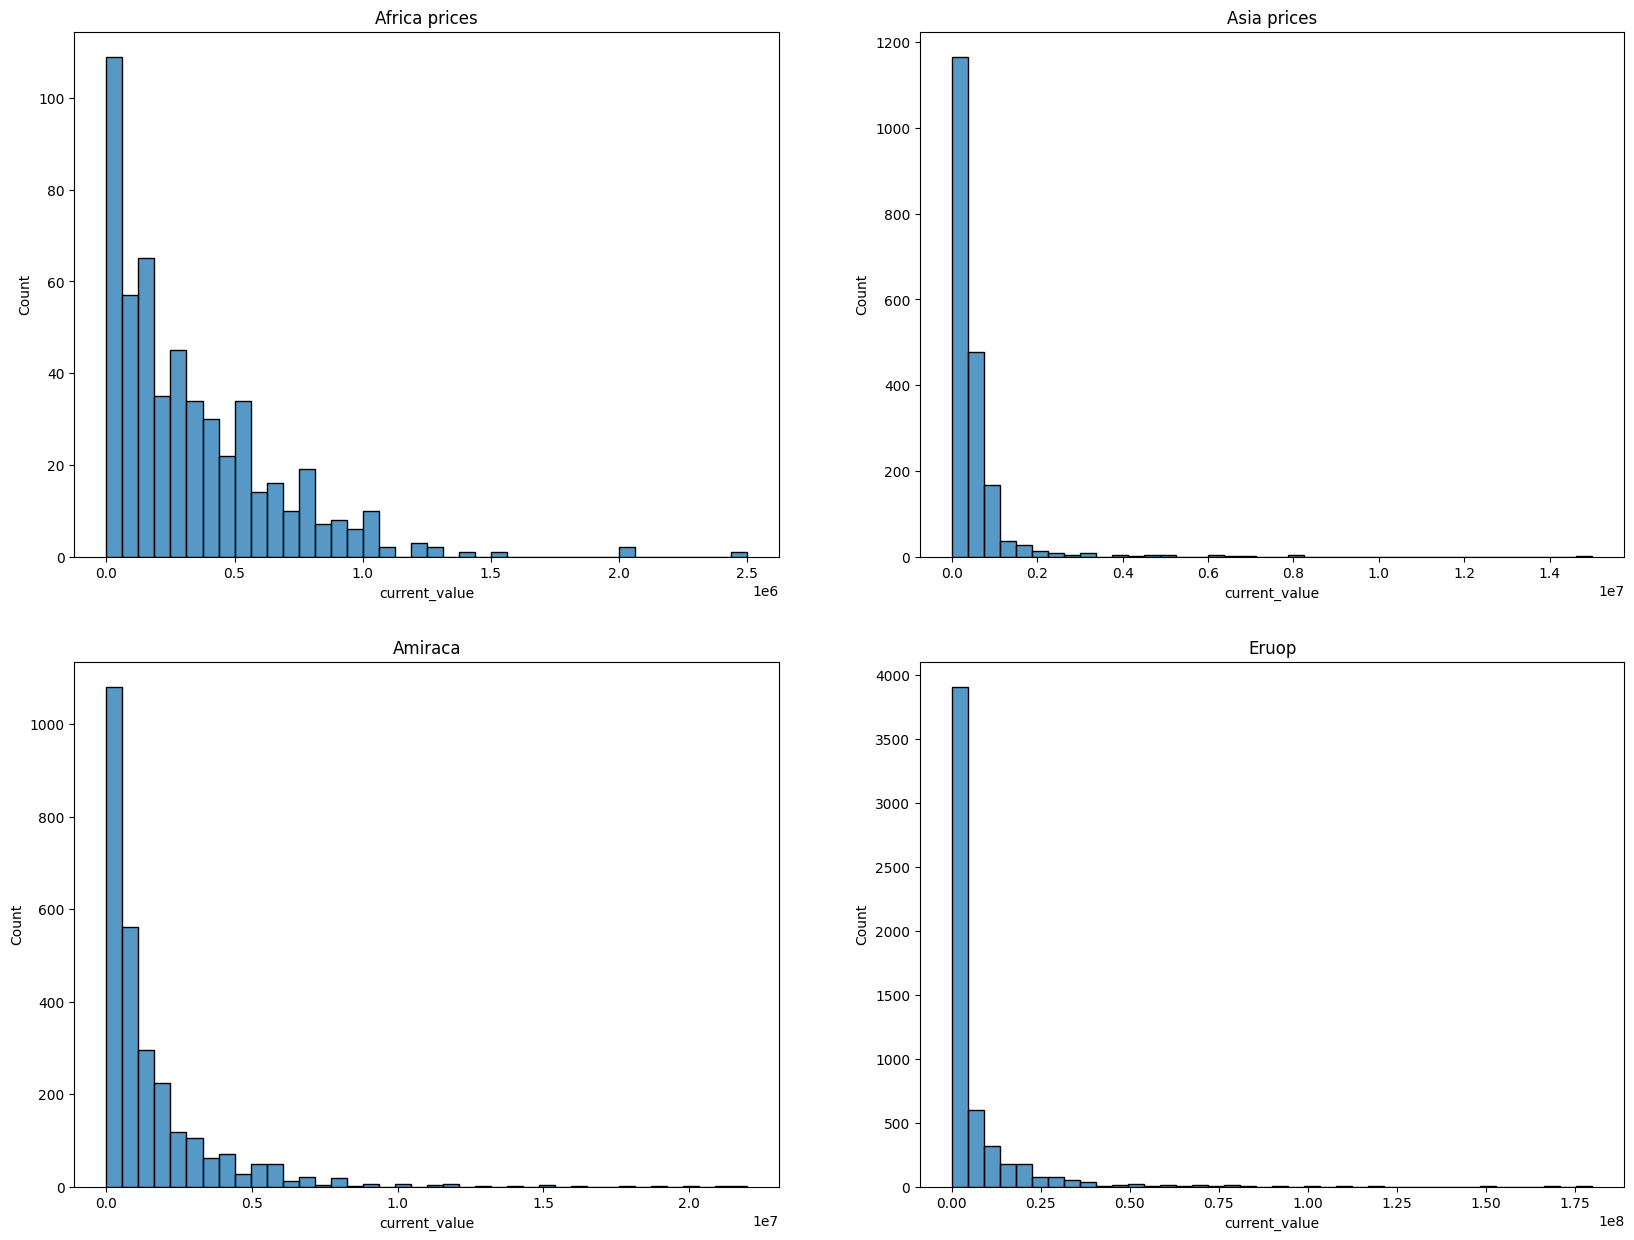

In [85]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(data=afr['current_value'], bins=40, ax=ax[0, 0])
ax[0, 0].set_title('Africa prices')
sns.histplot(data=asia['current_value'], bins=40, ax=ax[0, 1])
ax[0, 1].set_title('Asia prices')
sns.histplot(data=amr['current_value'], bins=40, ax=ax[1, 0])
ax[1, 0].set_title('Amiraca')
sns.histplot(data=eur['current_value'], bins=40, ax=ax[1, 1])
ax[1, 1].set_title('Eruop')

## *now we can detecet the outliers easly in each market*

In [90]:
afr=afr[afr['current_value']<=1600000]
afr.shape

(530, 22)

In [89]:
asia=asia[asia['current_value']<=4000000]
asia.shape

(1908, 22)

In [91]:
amr=amr[amr['current_value']<=12500000]
amr.shape

(2716, 22)

In [92]:
eur=eur[eur['current_value']<=75000000]
eur.shape

(5509, 22)

## *lets check the boxplot again: *

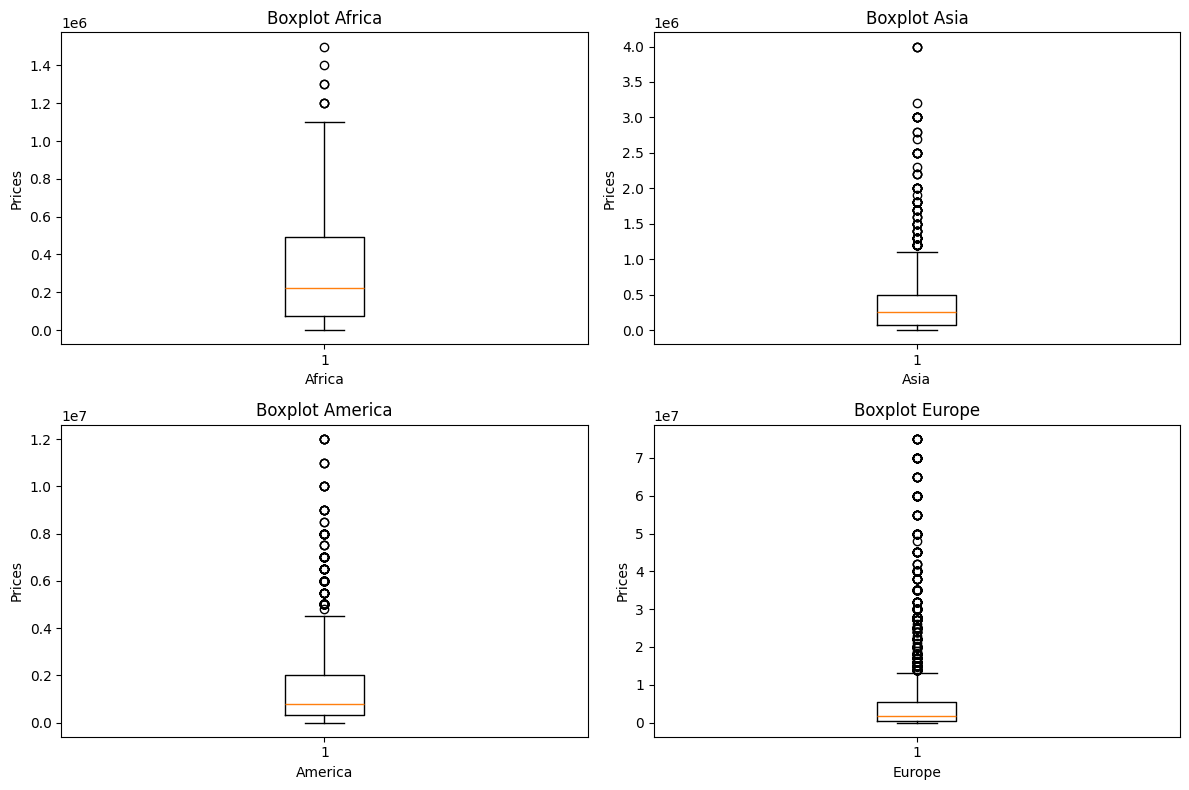

In [93]:
import matplotlib.pyplot as plt

# Create a figure with a size of 10x10 inches
plt.figure(figsize=(12, 8))

# First subplot: Boxplot for Africa
plt.subplot(2, 2, 1)
plt.boxplot(afr['current_value'])
plt.xlabel('Africa')
plt.ylabel('Prices')
plt.title('Boxplot Africa')

# Second subplot: Boxplot for Asia
plt.subplot(2, 2, 2)
plt.boxplot(asia['current_value'])
plt.xlabel('Asia')
plt.ylabel('Prices')
plt.title('Boxplot Asia')

# Third subplot: Boxplot for America
plt.subplot(2, 2, 3)
plt.boxplot(amr['current_value'])
plt.xlabel('America')
plt.ylabel('Prices')
plt.title('Boxplot America')

# Fourth subplot: Boxplot for Europe
plt.subplot(2, 2, 4)
plt.boxplot(eur['current_value'])
plt.xlabel('Europe')
plt.ylabel('Prices')
plt.title('Boxplot Europe')

# Show the plots
plt.tight_layout()
plt.show()


# **now we will create 4 models** 

In [122]:
asia.shape

(1908, 22)

In [116]:
from sklearn.model_selection import train_test_split
x = asia[['age','minutes played']]
y= asia['current_value']
print("Missing values in features:", x.isnull().sum())
print("Missing values in target:", y.isnull().sum())
# x = x.dropna()
# y = y.loc[x.index] 
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
from sklearn.linear_model import LinearRegression
asi = LinearRegression()
asi.fit(X_train,y_train)


Missing values in features: age               0
minutes played    0
dtype: int64
Missing values in target: 0


LinearRegression()

In [117]:
coeff = pd.DataFrame(asi.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,15802.947439
1,116.545854


In [118]:
print( 'intersepts= ' , asi.intercept_)

intersepts=  -175880.2893008542


In [119]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = asi.predict(X_test)
mse_train = mean_squared_error(y_train, asi.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, asi.predict(X_train))
ae_train = mean_absolute_error(y_train, asi.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute  Error of base model: 312484.00232693425
Mean Absolute Error for training: 258121.76700081152
Mean Absolute Error for testing: 264718.01166285883


C:\Users\ryyao\AppData\Local\Temp\ipykernel_1084\2764976213.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


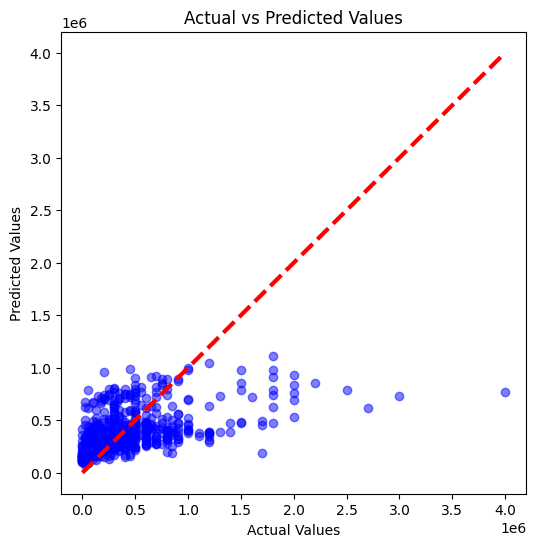

In [120]:
y_pred = asi.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


## **now for africa**

In [131]:
afr.shape

(533, 22)

In [130]:
from sklearn.model_selection import train_test_split
x = afr[['age','minutes played']]
y= afr['current_value']
print("Missing values in features:", x.isnull().sum())
print("Missing values in target:", y.isnull().sum())

# # Drop rows with any missing values
# x = x.dropna()
# y = y.loc[x.index] 
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
from sklearn.linear_model import LinearRegression
af = LinearRegression()
af.fit(X_train,y_train)


Missing values in features: age               0
minutes played    0
dtype: int64
Missing values in target: 0


LinearRegression()

In [133]:
coeff = pd.DataFrame(af.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,-21331.930622
1,141.220182


In [134]:
print( 'intersepts= ' , af.intercept_)

intersepts=  642579.7466589655


In [151]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = af.predict(X_test)
mse_train = mean_squared_error(y_train, af.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, af.predict(X_train))
ae_train = mean_absolute_error(y_train, af.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute  Error of base model: 1372138.879680747
Mean Absolute Error for training: 1321262.2827297356
Mean Absolute Error for testing: 1373255.121587211


C:\Users\ryyao\AppData\Local\Temp\ipykernel_1084\1963147062.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


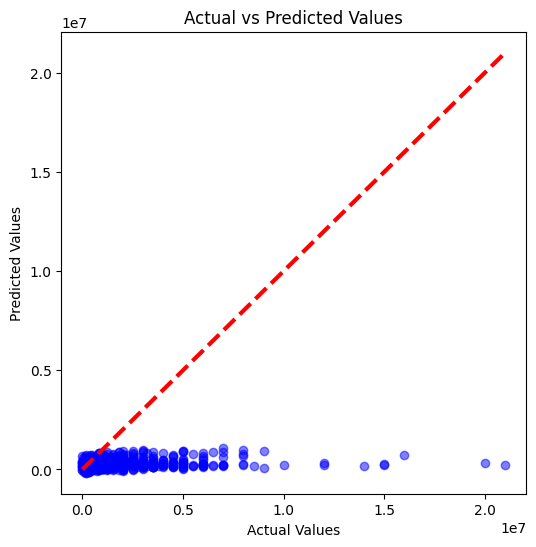

In [152]:
y_pred = af.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## *now lets create model for amiraca*

In [153]:
amr.shape

(2733, 22)

In [154]:
from sklearn.model_selection import train_test_split
x = amr[['age','minutes played']]
y= amr['current_value']
print("Missing values in features:", x.isnull().sum())
print("Missing values in target:", y.isnull().sum())

# # Drop rows with any missing values
# x = x.dropna()
# y = y.loc[x.index] 
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
from sklearn.linear_model import LinearRegression
am = LinearRegression()
am.fit(X_train,y_train)

Missing values in features: age               0
minutes played    0
dtype: int64
Missing values in target: 0


LinearRegression()

In [155]:
coeff = pd.DataFrame(am.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,-42783.665401
1,357.702114


In [156]:
print( 'intersepts= ' , am.intercept_)

intersepts=  2207607.137125316


In [157]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = am.predict(X_test)
mse_train = mean_squared_error(y_train, am.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, am.predict(X_train))
ae_train = mean_absolute_error(y_train, am.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute  Error of base model: 1372138.879680747
Mean Absolute Error for training: 1264612.1071252045
Mean Absolute Error for testing: 1319474.1096196314


C:\Users\ryyao\AppData\Local\Temp\ipykernel_1084\1380508185.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


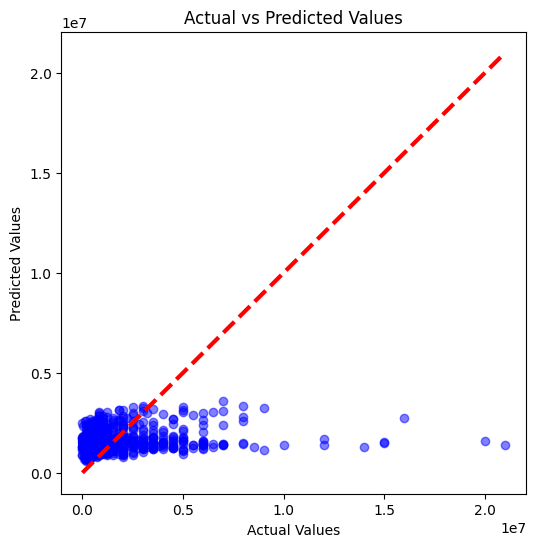

In [158]:
y_pred = am.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## **now lets create the last model for europ:**

In [159]:
eur.shape

(5509, 22)

In [172]:
from sklearn.model_selection import train_test_split
x = eur[['age','minutes played']]
y= eur['current_value']
print("Missing values in features:", x.isnull().sum())
print("Missing values in target:", y.isnull().sum())

# # Drop rows with any missing values
# x = x.dropna()
# y = y.loc[x.index] 
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.4, random_state=500)
from sklearn.linear_model import LinearRegression
eu = LinearRegression()
eu.fit(X_train,y_train)

Missing values in features: age               0
minutes played    0
dtype: int64
Missing values in target: 0


LinearRegression()

In [173]:
coeff = pd.DataFrame(eu.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,-274813.473725
1,2202.984526


In [174]:
print( 'intersepts= ' , eu.intercept_)

intersepts=  4642289.5974580385


In [175]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = eu.predict(X_test)
mse_train = mean_squared_error(y_train, eu.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, eu.predict(X_train))
ae_train = mean_absolute_error(y_train, eu.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute  Error of base model: 6312950.343344929
Mean Absolute Error for training: 5275001.80390626
Mean Absolute Error for testing: 5597129.463895039


C:\Users\ryyao\AppData\Local\Temp\ipykernel_1084\2750826245.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


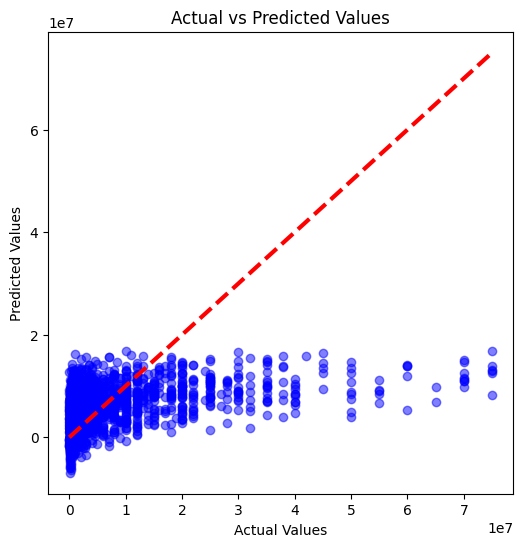

In [176]:
y_pred = eu.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()